# Homework 1 : CUAHSI VU : Snow Hydrology

# B. Example

So now you have learned something about pySUMMA, you have downloaded a resource from HydroShare and you have uploaded a resource to HydroShare. But we still have not run SUMMA yet. In this notebook we will take you through some sample SUMMA simulations that will make it possible for you to do the actual exercises. Just follow along and you will almost be ready for the homework exercises.

Remember that you want to save your notebooks in a place other than the `examples` directory tree, because files you save there may be deleted and overwritten the next time you start your virtual machine. Save your files somewhere in the `work` directory tree: `work/homework_1` would be a great place for them. So click on "_File --> Save Notebook As..._" and save this notebook as `work/homework_1/homework_1_B_example.ipynb` before you continue. If things go hopelessly wrong, you can always start over again with the original notebook in your `examples` directory tree.

The SUMMA example that we'll run through will reproduce Figure 7 in [Clark et al. (2015)](http://doi.org/10.1002/2015WR017200). The team at the [Hydroinformatics Research Group at the University of Virginia](https://uvahydroinformatics.org/) converted the example to use pySUMMA.

The next line just ensures that any plots we create in this notebook will be visible in your notebook (it's called a [magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html) command).

In [1]:
%matplotlib inline

## Sensitivity to stomatal resistance parameterizations

One part of the [Clark et al. (2015)](http://doi.org/10.1002/2015WR017200) paper explored the impact of different stomatal resistance parameterizations in SUMMA on simulated total evapotranspiration (ET) for the Reynolds Mountain East catchment. They used three stomatal resistance parameterizations in SUMMA: the simple resistance method, the Ball Berry method, and the Jarvis method. We don't describe the methods in any detail here, but focus on how to run SUMMA.

In this Jupyter notebook, the pySUMMA library is used to reproduce this analysis. We show how pySUMMA can be used to create three different versions of the Reynolds Mountain East catchment model, one for each stomatal resistance parameterization. Along the way, we'll show you how you can conduct your SUMMA simulations for the homework assignments using pySUMMA in a Jupyter notebook.

## Download the SUMMA test cases from HydroShare 

We will download a HydroShare resource that contains a number of SUMMA test cases and will then use one of these test cases to do the simulations for this example. Because the test cases are used quite a lot in the SUMMA tutorials, there is a function for this in the pySUMMA package. For now, don't modify the path where the test cases are installed, because it is hardcoded in some of the SUMMA input files for the purpose of this tutorial.

In [2]:
from pysumma.utils import utils

# set the directory where the SUMMA test cases will be stored
store_path = '/home/jovyan/work'
# install the test cases into store_path
testcase_path = utils.install_test_cases_hs(store_path)

The full path to the SUMMA test cases is now stored in `testcase_path`.

In [4]:
testcase_path

'/home/jovyan/work/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents'

You can look at these directories in the file manager on the left, but there is nothing else you currently need to do with this. Now that the SUMMA setups are available on your virtual machine, we can create a pySUMMA simulation object.

## Create and configure a pySUMMA simulation object

pySUMMA allows you to create a simulation object that contains all the information needed to run a SUMMA simulation. The object is fairly simple, but contains the locations of all the input files and allows you to interact with the SUMMA configuration files, without you having to edit individual files and figuring out which information goes where. 

We'll create a simulation object and then configure that simulation object for our SUMMA model run. When we create the simulation object, we have to provide it with the path to the main input file for SUMMA (file manager file) and we have to tell it the directory tree where the SUMMA source code is installed (because it parses some source code files as well). The main input file is part of the test cases that we downloaded in the previous step. The SUMMA source code is installed in the `/opt/summa` directory tree in your virtual machine.

In [5]:
from pysumma.Simulation import Simulation

# create a pySUMMA simulation object. 
# `case_data` has the path to the main SUMMA input file for this simulation.
# `summa_code` has the path to the SUMMA source code directory tree
filemanager_path = testcase_path + '/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenSimpleResistance.txt'
# ignore the message that pops up
S = Simulation(case_data=filemanager_path, summa_code='/opt/summa') 

ModelOuput master file filepath: /opt/summa/build/source/dshare/var_lookup.f90


The simulation object contains information about the model decisions that should be used for the SUMMA simulations. More information about the decisions can be found in the [SUMMA documentation](https://summa.readthedocs.io/en/latest/input_output/SUMMA_input/#infile_model_decisions). For example, the stomatal resistance decision (`stomResist`) has three different options.

In [6]:
S.decision_obj.stomResist.options

['BallBerry', 'Jarvis', 'simpleResistance']

In the first simulations we will use the `simpleResistance` option. We will also set the start (`simulStart`) and end (`simulEnd`) time of the simulations. To set an option, you can use `S.decision_obj.<decision>.value = <option>`, so in this case

In [7]:
# set the simulation start and finish times
S.decision_obj.simulStart.value = "2006-07-01 00:00"
S.decision_obj.simulFinsh.value = "2007-08-20 00:00"

# set the stomatal resistance option
S.decision_obj.stomResist.value = 'simpleResistance'

Now we are all set to perform the actual SUMMA simulation. Note that there are many more decisions and variables, but we'll use the settings that were already configured for the test case. Configuring SUMMA from scratch requires a lot more effort than this. But for this example we can move on to the next step.

## Run SUMMA

Running SUMMA is now easy. We will use the Simulation object, which returns a result object and the location of the SUMMA output file. We will also specify a `run_suffix` that becomes part of the  output file names so that we can distinguish multiple simulations. Finally, we need to specify the `run_option`, which is `local` since the executable is installed locally on your virtual machine (pySUMMA also has an option to use docker images, don't worry if this means nothing to you at this time). SUMMA output files use the [NetCDF format](https://www.unidata.ucar.edu/software/netcdf/), which is widely use in earth science (particularly atmospheric science and hydrology).

When you execute the following step, it will send some information to your notebook. If everything works as it should, then the final line will be `FORTRAN STOP: finished simulation successfully.`. This first model run should only take a few seconds.

In [8]:
results_simple, outfile_simple = S.execute(run_suffix="simple", run_option = 'local')

file_suffix is 'simple'.
file_master is '/home/jovyan/work/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenSimpleResistance.txt'.
start at 06:48:14
Name of Model Output control file: /home/jovyan/work/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/meta/Model_Output.txt
decisions file =  /home/jovyan/work/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_zDecisions_riparianAspenSimpleResistance.txt
   1 simulStart: 2006-07-01 00:00
   2 simulFinsh: 2007-08-20 00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: simpleResistance
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: specified
  10 f_Richards: mixdform
  11 groundwatr: noXplict
  12 hc_profile: consta

The results object `results_simple` contains an [xarray](http://xarray.pydata.org/en/stable/) Dataset with all the SUMMA output variables that were specified in your setup (you can change this). This same information is also stored in the SUMMA output file, whose location is stored as `outfile_simple`. If you are already familiar with xarray, then you can do a lot of your analysis with `results_simple`. Teaching you xarray is beyond the scope of this course, but if you know about it then you can do things like (don't worry if you get a warning, as long as a plot appears you are all good to go on).

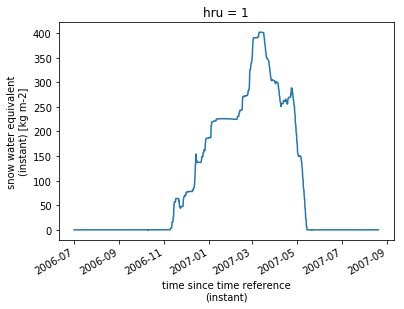

In [9]:
# Plot the Snow Water Equivalent time series
results_simple.scalarSWE.plot()

Similarly, you could quickly calculate derived quantities like the mean snow water equivalent (SWE) by month and plot it (again don't worry if you get a warning).

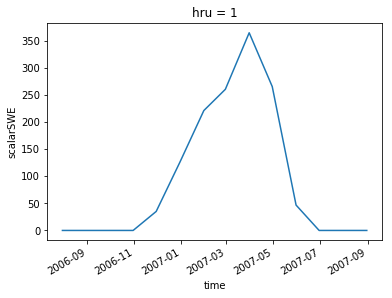

In [10]:
# Calculate the mean air temperature by month
results_simple.scalarSWE.isel(hru=0).resample(time='M').mean().plot()

Congratulations. You did your first SUMMA simulation. We will now configure two more simulation objects and do the same simulations with two different options for `stomResist`. If you don't know xarray and don't know how to work with NetCDF files don't worry, we'll show you how to convert the SUMMA output to ASCII and save it to files that you can add to the HydroShare resource that you will upload to HydroShare. You can then download those files to your own computer and analyze them there using your preferred analysis software.

## Create, configure, and run two more SUMMA instances

Configure SUMMA with the `BallBerry` option for stomatal resistance and run. We will re-use the same simulation object, but select a different option and write to a different file and result object.

In [11]:
S.decision_obj.stomResist.value = 'BallBerry'
results_ballberry, outfile_ballberry = S.execute(run_suffix="ballberry", run_option = 'local')

file_suffix is 'ballberry'.
file_master is '/home/jovyan/work/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenSimpleResistance.txt'.
start at 06:59:16
Name of Model Output control file: /home/jovyan/work/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/meta/Model_Output.txt
decisions file =  /home/jovyan/work/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_zDecisions_riparianAspenSimpleResistance.txt
   1 simulStart: 2006-07-01 00:00
   2 simulFinsh: 2007-08-20 00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: BallBerry
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: specified
  10 f_Richards: mixdform
  11 groundwatr: noXplict
  12 hc_profile: constant
 

One more time with the `Jarvis` option for stomatal resistance.

In [12]:
S.decision_obj.stomResist.value = 'Jarvis'
results_jarvis, outfile_jarvis = S.execute(run_suffix="jarvis", run_option = 'local')

file_suffix is 'jarvis'.
file_master is '/home/jovyan/work/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_fileManager_riparianAspenSimpleResistance.txt'.
start at 06:59:39
Name of Model Output control file: /home/jovyan/work/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/meta/Model_Output.txt
decisions file =  /home/jovyan/work/a0105d479c334764ba84633c5b9c1c01/a0105d479c334764ba84633c5b9c1c01/data/contents/summaTestCases_2.x/settings/wrrPaperTestCases/figure07/summa_zDecisions_riparianAspenSimpleResistance.txt
   1 simulStart: 2006-07-01 00:00
   2 simulFinsh: 2007-08-20 00:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: Jarvis
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: specified
  10 f_Richards: mixdform
  11 groundwatr: noXplict
  12 hc_profile: constant
  13 bc

Just to demonstrate that the results really are different, we can quickly plot the monthly latent heat flux using xarray (since we would expect that changing the stomatal resistance would change the latent heat flux). The sign convention in SUMMA is that a flux away from the surface is negative (again, just ignore the warnings). The units are in $W/m^{-2}$.

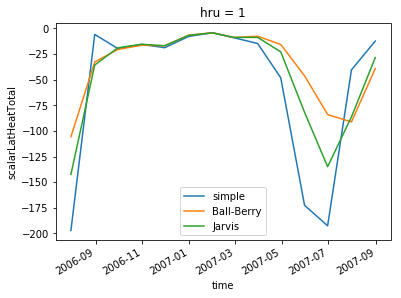

In [13]:
# Plot the monthly total latent heat flux time series
import matplotlib.pyplot as plt
results_simple.scalarLatHeatTotal.isel(hru=0).resample(time='M').mean().plot(label='simple')
results_ballberry.scalarLatHeatTotal.isel(hru=0).resample(time='M').mean().plot(label='Ball-Berry')
results_jarvis.scalarLatHeatTotal.isel(hru=0).resample(time='M').mean().plot(label='Jarvis')
plt.legend()

Snow water equivalent on the other hand remains relatively unchanged.

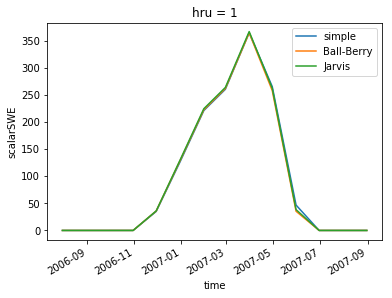

In [14]:
# Plot the monthly snow water equivalent time series
results_simple.scalarSWE.isel(hru=0).resample(time='M').mean().plot(label='simple')
results_ballberry.scalarSWE.isel(hru=0).resample(time='M').mean().plot(label='Ball-Berry')
results_jarvis.scalarSWE.isel(hru=0).resample(time='M').mean().plot(label='Jarvis')
plt.legend()

## Reproduce Figure 7 in Clark et al. (2015)

The following code is pretty specific to the reproduction of Figure 7 in Clark et al. (2015) and can be simplified by using some more xarray capabilities. Don't worry about the actual code here. We just want to demonstrate that the SUMMA simulations that you just performed are basically the same as those that were used in the SUMMA paper (they are slightly different because SUMMA itself has changed a bit). Just run the code in the next few cells and look at the output and compare it to Figure 7 in Clark et al. (2015).

In [20]:
# import some more plotting functionality and some packages
from pysumma.Plotting import Plotting
from jupyterthemes import jtplot
import pandas as pd

# set the figure size in the notebook
jtplot.figsize(x=10, y=10)

ModuleNotFoundError: No module named 'jupyterthemes'

In [16]:
# Create a function to calculation the total evapotranspiration by hour
def calc_total_et(et_output_df):
    # Total Evapotranspiration = Canopy Transpiration + Canopy Evaporation + Ground Evaporation
    # Change unit from kgm-2s-1 to mm/hr (mulpitle 3600)
    total_et_data = (et_output_df['scalarCanopyTranspiration'] + et_output_df['scalarCanopyEvaporation'] + et_output_df['scalarGroundEvaporation'])*3600
    # create dates(X-axis) attribute from ouput netcdf
    dates = total_et_data.coords['time'].data
    # create data value(Y-axis) attribute from ouput netcdf
    data_values = total_et_data.data
    # create two dimensional tabular data structure 
    total_et_df = pd.DataFrame(data_values, index=dates)
    # round time to nearest hour (ex. 2006-10-01T00:59:59.99 -> 2006-10-01T01:00:00)
    total_et_df.index = total_et_df.index.round("H")
    # set the time period to display plot 
    total_et_df = total_et_df.loc["2007-06-01":"2007-08-20"]
    # resample data by the average value hourly
    total_et_df_hourly = total_et_df.resample("H").mean()
    # resample data by the average for hour of day
    total_et_by_hour = total_et_df_hourly.groupby(total_et_df_hourly.index.hour).mean()
    return total_et_by_hour

In [17]:
# Calculate the total ET by hour for the three stomatal resistance implementations
results_simple_hour = calc_total_et(results_simple)
results_ballberry_hour = calc_total_et(results_ballberry)
results_jarvis_hour = calc_total_et(results_jarvis)

# Combine the results into a single data frame
ET_Combine = pd.concat([results_ballberry_hour, results_jarvis_hour, results_simple_hour], axis=1)
ET_Combine.columns = ['Ball-Berry', 'Jarvis', 'Simple']

NameError: name 'pd' is not defined

In [18]:
# Read observation data from file
# create pySUMMA Plotting Object
Val_eddyFlux = Plotting(testcase_path+'/summaTestCases_2.x/testCases_data/validationData/ReynoldsCreek_eddyFlux.nc')
# read Total Evapotranspiration(LE-wpl) from validation netcdf file
Obs_Evapotranspitaton = Val_eddyFlux.ds['LE-wpl']
# create dates(X-axis) attribute from validation netcdf file
dates = Obs_Evapotranspitaton.coords['time'].data
# Change unit from Wm-2 to mm/hr (1 Wm-2 = 0.0864 MJm-2day-1, 1 MJm-2day-1 = 0.408 mmday-1, 1day = 24h)
data_values = Obs_Evapotranspitaton.data*0.0864*0.408/24
# create two dimensional tabular data structure 
df = pd.DataFrame(data_values, index=dates)
# set the time period to display plot
df_filt = df.loc["2007-06-01":"2007-08-20"]
# select aspen obervation station among three different stations
df_filt.columns = ['-','Observation (aspen)','-']
# resample data by the average for hour of day
df_gp_hr = df_filt.groupby([df_filt.index.hour, df_filt.index.minute]).mean()
# reset index so each row has an hour an minute column
df_gp_hr.reset_index(inplace=True)
# add hour and minute columns for plotting
xvals = df_gp_hr.reset_index()['level_0'] + df_gp_hr.reset_index()['level_1']/60.

NameError: name 'pd' is not defined

In [19]:
# Create and display the plot
ET_Combine_Graph = ET_Combine.plot(legend=False)
# invert y axis
ET_Combine_Graph.invert_yaxis()

ET_Combine_Graph.plot(ET_Combine['Ball-Berry'],color='b', marker='^') 
ET_Combine_Graph.plot(ET_Combine['Jarvis'], color='g', marker='o')
ET_Combine_Graph.plot(ET_Combine['Simple'], color='y', marker='d')

ET_Combine_Graph.tick_params(labelsize = 15)
# plot scatter with x='xvals', y='Observation (aspen)'
d = ET_Combine_Graph.scatter(xvals, df_gp_hr['Observation (aspen)'], color='black')
# add x, y label
ET_Combine_Graph.set_xlabel("Time of day (hr)", fontsize=18)
ET_Combine_Graph.set_ylabel("Total evapotranspiration (mm h-1)", fontsize=18)

handles, labels = ET_Combine_Graph.get_legend_handles_labels()
# show up the legend
ET_Combine_Graph.legend(handles[3:7], labels[3:7])
jtplot.figsize(x=10, y=10)

NameError: name 'ET_Combine' is not defined

Again note that the ET fluxes are negative because of SUMMA's sign convention (negative away from the surface). Don't worry if the plotting code is not clear to you. You can make your own plots in the homework assignments.

## Save the results to HydroShare

So now that we have three new SUMMA simulations, we want to combine the model output files into a single HydroShare resource and share that on Hydroshare. We'll follow the same steps as in the previous SUMMA worksheet (`homework_1/homework_1_A_introduction.ipynb`). We'll first create a hydroshare object using pySUMMA to collect the information.

In [21]:
from pysumma.hydroshare import hydroshare
hs_up = hydroshare.hydroshare()

Successfully established a connection with HydroShare


In [22]:
# write meta data such as abstract, title, keywords, resource type
title = 'SUMMA sensitivity to stomatal resistance formulation'
abstract = 'Reproduce figure 7 in Clark et al., 2015'
keywords = ('stomatal resistance', 'Jupyter', 'SUMMA')
resource_type = 'genericresource'

In [23]:
# define the author for the resource
metadata = '[{"creator":{"name":"Diligent student"}}]'

In [24]:
# Define the files that will be included in the resource.
# We will upload the SUMMA result files. Note that you want to 
# upload the results files, not the result objects!
files = outfile_simple, outfile_ballberry, outfile_jarvis

And we then send it to HydroShare.

In [25]:
# post simulation results of simpleResistance back to HS
resource_id = hs_up.createHydroShareResource(title=title, content_files=files, keywords=keywords, abstract=abstract, 
                                             resource_type=resource_type, public=False)

Resource Created Successfully
Successfully Added Content Files


Click on the link and examine your new resource. As you will find, the resource has three different files associated it, which you can download as a package or as individual files. In this case, there are three files:

* vegImpactsTranspire_output_ballberry_timestep.nc
* vegImpactsTranspire_output_simple_timestep.nc
* vegImpactsTranspire_output_jarvis_timestep.nc

All these files have the `.nc` extension, which by convention indicates that the files are in the [NetCDF format](https://www.unidata.ucar.edu/software/netcdf/). If you are not familiar with this format, then it would be a good idea for your research career to learn how to read them. A lot of analysis software will be able to read NetCDF files directly or through the use of some add-ons (this includes python, R, matlab, etc.). Some of the nice features of NetCDF files are that the metadata is part of the files themselves, the files are machine-independent, and they are great for storing multi-dimensional data. For example, the SUMMA NetCDF files include the settings for the model decisions as part of the metadata.

So in general, if you can read the NetCDF files directly into your analysis software that is the preferred way to go. However, this course is not long enough to teach you how to do all this and you can learn much of this on your own. If you are not able to read NetCDF files, the easiest way to proceed is to export some of the data as csv files (_comma-separated values_), which can be read by almost any analysis software. You can do that on your local machine, but here we'll show you how to export some of your data to csv and add it to your existing HydroShare resource. 

As an example, let's export `scalarSWE` for the `simple` case and then also export `mLayerTemp`, which is the temperature for each layer (soil and snow).

Note that these variables have different dimensions: 

In [26]:
results_simple[['scalarSWE']].dims

Frozen(SortedKeysDict({'hru': 1, 'time': 9961}))

In [27]:
results_simple[['mLayerTemp']].dims

Frozen(SortedKeysDict({'hru': 1, 'midToto': 13, 'time': 9961}))

`scalarSWE` is defined along the `hru` and `time` dimensions, while `mLayerTemp` is defined along the `midToto`, `hru`, and `time` dimensions. 

An `hru` is a _hydrologic response unit_ and is the smallest spatial element in SUMMA. Since we are doing point simulations, there is only one `hru` element, so we can drop it when we write the output as ASCII. 

The `midToto` dimension reflects the number of layers (including both soil and snow layers). Since we have a different `mLayerTemp` for each soil and snow layer, we need to store a value for each layer for each timestep.

The `time` dimension simply reflects the time.

We will use some xarray and [pandas](http://pandas.pydata.org/) (another really useful python package) functionality to write these variables to csv files. To make your csv files easier to manage, it is best to write the files so that all variables in a single file have the same dimensions.

So let's export `scalarSWE` and store it in `swe_file` that we will then add to your existing HydroShare resource. It's up to you to give the files meaningful names and to make sure that you are pointing to the right files.

In [28]:
swe_simple_file = '/home/jovyan/work/swe_export_simple.csv'
results_simple[['scalarSWE']].drop('hru').squeeze().to_dataframe().to_csv(swe_simple_file)

So let's step through this. 
* select the variable `scalarSWE` in the `results_simple` DataSet: `results_simple[['scalarSWE']]`
* drop the `hru` dimension : `.drop('hru')`
* drop any unused dimenions : `.squeeze()`
* convert the result to a pandas dataframe : `.to_dataframe()`
* save the results as a csv file to `swe_simple_file` : `.to_csv(swe_simple_file)`

If you navigate to the file manager on your left, you can find the file and open it to make sure it looks as you'd expect. Let's now save `mLayerTemp` as well (to a different file).

In [29]:
mlayertemp_simple_file = '/home/jovyan/work/mlayertemp_export_simple.csv'
results_simple[['mLayerTemp']].drop('hru').squeeze().to_dataframe().to_csv(mlayertemp_simple_file)

If you look at this file, you will notice that there is an additional column labeled `midToto` with the layer number. I'm not sure what the easiest way is to process this data in your favorite analysis software, but that is for you to find out.

As the last step, we will add the `swe_simple_file` and the `mlayertemp_simple_file` to your existing HydroShare resource identified by `resource_id`.

In [30]:
hs_up.addContentToExistingResource(resource_id, 
                                   [swe_simple_file, mlayertemp_simple_file])

Successfully Added Content Files


If you now revisit the HydroShare web site for your resource, you will see that the two files have been uploaded to the same resource.

## On to the next step

That's it for the example. Feel free to delete your new resource on the HydroShare web site or to admire it for a while longer, you can also make it public and share it with others and add other data or more meta data information.

Save this notebook and close the tab. You can also right-click on the file in the left panel if it has a green dot next to it and select "_Shutdown kernel_" from the popup menu to stop the python session that is executing the commands in this notebook. Then open the next notebook: `/home/jovyan/examples/homework_1/homework_1_C_setup.ipynb`.

## References

* Clark, M. P., B. Nijssen, J. Lundquist, D. Kavetski, D. Rupp, R. Woods, J. Freer, E. Gutmann, A. Wood, D. Gochis, R. Rasmussen, D. Tarboton, V. Mahat, G. Flerchinger, D. Marks, 2015: A unified approach for process-based hydrologic modeling: Part 2. Model implementation and case studies. _Water Resources Research_, [doi:10.1002/2015WR017200](http://doi.org/10.1002/2015WR017200).